# SmartInvestment.com

<img src='https://www.wealthwithin.com.au/public/img/16x9/trading-the-stock-market.jpg' width='700px'>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Part1: 
### Let's gather our data:
I put all the csv files in a folder named "market_data" for easy access.<br>
I gather the data of the SPX500, then I concatenate it to have one single dataframe for SPX500.<br>
I use <b>df.head()</b> to get a look at how our data looks and see if there is anything I need to correct.

In [2]:
# Path to the folder with all csv files
path_to_csv = 'market_data'
spx_df1 = pd.read_csv(path_to_csv + '/SPX_1.csv')
spx_df2 = pd.read_csv(path_to_csv + '/SPX_2.csv')
spx_df = pd.concat([spx_df2, spx_df1], ignore_index = True)
spx_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-12-01 00:00:00-05:00,4087.139893,4100.509766,4050.870117,4076.570068,4527130000,0.0,0.0
1,2022-12-02 00:00:00-05:00,4040.169922,4080.479980,4026.629883,4071.699951,4012620000,0.0,0.0
2,2022-12-05 00:00:00-05:00,4052.020020,4052.449951,3984.489990,3998.840088,4280820000,0.0,0.0
3,2022-12-06 00:00:00-05:00,3996.629883,4001.510010,3918.389893,3941.260010,4368380000,0.0,0.0
4,2022-12-07 00:00:00-05:00,3933.280029,3957.570068,3922.679932,3933.919922,4118050000,0.0,0.0


Now let's take a look at how our data looks like at the bottom of our dataframe using <b>df.tail()</b>

In [3]:
spx_df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
222,2023-10-20 00:00:00-04:00,4273.850098,4276.560059,4223.029785,4224.160156,4004030000,0.0,0.0
223,2023-10-23 00:00:00-04:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,0.0,0.0
224,2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,0.0,0.0
225,2023-10-25 00:00:00-04:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,0.0,0.0
226,2023-10-26 00:00:00-04:00,4175.990234,4183.600098,4127.899902,4137.229980,2984569204,0.0,0.0


Since everything looks right let's have a look at the information of our dataframe using <b>df.info()</b>

In [4]:
spx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          227 non-null    object 
 1   Open          227 non-null    float64
 2   High          227 non-null    float64
 3   Low           227 non-null    float64
 4   Close         227 non-null    float64
 5   Volume        227 non-null    int64  
 6   Dividends     227 non-null    float64
 7   Stock Splits  227 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 14.3+ KB


Here I realize that our date is a string and not a datetime. In order to work with this column we will have to parse it.<br>I will do so by first getting rid of the timezone as it was instructed by the professor.

In [5]:
spx_df['Date'] = spx_df['Date'].str.replace(r'[-+]\d{2}:\d{2}$', '', regex='True')
spx_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-12-01 00:00:00,4087.139893,4100.509766,4050.870117,4076.570068,4527130000,0.0,0.0
1,2022-12-02 00:00:00,4040.169922,4080.479980,4026.629883,4071.699951,4012620000,0.0,0.0
2,2022-12-05 00:00:00,4052.020020,4052.449951,3984.489990,3998.840088,4280820000,0.0,0.0
3,2022-12-06 00:00:00,3996.629883,4001.510010,3918.389893,3941.260010,4368380000,0.0,0.0
4,2022-12-07 00:00:00,3933.280029,3957.570068,3922.679932,3933.919922,4118050000,0.0,0.0
...,...,...,...,...,...,...,...,...
222,2023-10-20 00:00:00,4273.850098,4276.560059,4223.029785,4224.160156,4004030000,0.0,0.0
223,2023-10-23 00:00:00,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,0.0,0.0
224,2023-10-24 00:00:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,0.0,0.0
225,2023-10-25 00:00:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,0.0,0.0


Now that the timezone has been successfully removed, let's parse our date column to datetime.

In [6]:
spx_df['Date'] = pd.to_datetime(spx_df['Date'], format='%Y-%m-%d %H:%M:%S')
spx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          227 non-null    datetime64[ns]
 1   Open          227 non-null    float64       
 2   High          227 non-null    float64       
 3   Low           227 non-null    float64       
 4   Close         227 non-null    float64       
 5   Volume        227 non-null    int64         
 6   Dividends     227 non-null    float64       
 7   Stock Splits  227 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 14.3 KB


Now that our date column is not a string anymore, we can use <b>df.dt.to_period()</b> in order to get a column with the fiscal quarter of each row. 

In [7]:
spx_df['Quarter'] = spx_df['Date'].dt.to_period('Q')
spx_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Quarter
0,2022-12-01,4087.139893,4100.509766,4050.870117,4076.570068,4527130000,0.0,0.0,2022Q4
1,2022-12-02,4040.169922,4080.479980,4026.629883,4071.699951,4012620000,0.0,0.0,2022Q4
2,2022-12-05,4052.020020,4052.449951,3984.489990,3998.840088,4280820000,0.0,0.0,2022Q4
3,2022-12-06,3996.629883,4001.510010,3918.389893,3941.260010,4368380000,0.0,0.0,2022Q4
4,2022-12-07,3933.280029,3957.570068,3922.679932,3933.919922,4118050000,0.0,0.0,2022Q4
...,...,...,...,...,...,...,...,...,...
222,2023-10-20,4273.850098,4276.560059,4223.029785,4224.160156,4004030000,0.0,0.0,2023Q4
223,2023-10-23,4210.399902,4255.839844,4189.220215,4217.040039,3776100000,0.0,0.0,2023Q4
224,2023-10-24,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,0.0,0.0,2023Q4
225,2023-10-25,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,0.0,0.0,2023Q4


Now it's time to calculate the percentage of the gain/loss of each quarter for the SPX500 fund.

In [8]:
#TODO: Change this code to make it less hard coded 
spx_gain_loss_arr = spx_df.groupby('Quarter')['Close'].last()
# Let's calculate the difference of the close price of that quarter minus the close price of the previous quarter.
spxQ1 = spx_gain_loss_arr[1] - spx_gain_loss_arr[0]
spxQ2 = spx_gain_loss_arr[2] - spx_gain_loss_arr[1]
spxQ3 = spx_gain_loss_arr[3] - spx_gain_loss_arr[2]
# Now let's get the percentage of the gain/loss.
percentage_gain_loss_Q1 = (spxQ1 / spx_gain_loss_arr[0]) * 100
percentage_gain_loss_Q2 = (spxQ2 / spx_gain_loss_arr[1]) * 100
percentage_gain_loss_Q3 = (spxQ3 / spx_gain_loss_arr[2]) * 100
# Let's round the percentages to two decimal places.
percentage_gain_loss_Q1 = round(percentage_gain_loss_Q1, 2)
percentage_gain_loss_Q2 = round(percentage_gain_loss_Q2, 2)
percentage_gain_loss_Q3 = round(percentage_gain_loss_Q3, 2)
spx_gain_loss_arr

Quarter
2022Q4    3839.500000
2023Q1    4109.310059
2023Q2    4450.379883
2023Q3    4288.049805
2023Q4    4137.229980
Freq: Q-DEC, Name: Close, dtype: float64

Now that the data is ready let's put it in a dataframe.

In [9]:
# Create a DataFrame
data = {
    'Quarter': ['2023Q1', '2023Q2', '2023Q3'],
    'SPX Gain/Loss %': [percentage_gain_loss_Q1, percentage_gain_loss_Q2, percentage_gain_loss_Q3]
}

spx_df_gain_loss = pd.DataFrame(data)
spx_df_gain_loss

,Quarter,SPX Gain/Loss %
0,2023Q1,7.03
1,2023Q2,8.30
2,2023Q3,-3.65


Now let's import the data from the different stocks that our fund is composed of and combine them into one dataframe.

In [10]:
# Create an empty DataFrame to store the combined data.
combined_df = pd.DataFrame()

# Create a dictionary with the weights of each stock.
portfolio = {
    "META": 0.15,
    "NFLX": 0.10,
    "AAPL": 0.25,
    "TSLA": 0.15,
    "GOOGL": 0.20,
    "AMZN": 0.15,
}

# Loop through the portfolio and read the sequential CSV files.
for symbol, weight in portfolio.items():
    stock_data = pd.DataFrame()  # Create an empty DataFrame for each stock
    for i in range(2, 0, -1):
        file_name = f"{symbol}_{i}.csv"
        temp_data = pd.read_csv(path_to_csv + '/' + file_name, usecols=[0,4])
        # Add a column named stock that will contain the name of the stock that we will use to group by.
        temp_data["Stock"] = symbol
        # Add a column named weight that will contain the weight of the stock.
        temp_data["Weight"] = weight
        stock_data = pd.concat([stock_data, temp_data], ignore_index=True)
    combined_df = pd.concat([combined_df, stock_data], ignore_index=True)

combined_df = combined_df.reset_index()
combined_df

,index,Date,Close,Stock,Weight
0,0,2022-12-01 00:00:00-05:00,120.440002,META,0.15
1,1,2022-12-02 00:00:00-05:00,123.489998,META,0.15
2,2,2022-12-05 00:00:00-05:00,122.430000,META,0.15
3,3,2022-12-06 00:00:00-05:00,114.120003,META,0.15
4,4,2022-12-07 00:00:00-05:00,113.930000,META,0.15
...,...,...,...,...,...
1357,1357,2023-10-20 00:00:00-04:00,125.169998,AMZN,0.15
1358,1358,2023-10-23 00:00:00-04:00,126.559998,AMZN,0.15
1359,1359,2023-10-24 00:00:00-04:00,128.559998,AMZN,0.15
1360,1360,2023-10-25 00:00:00-04:00,121.389999,AMZN,0.15


Using the same method as we did before for SPX we parse our Date column.

In [11]:
combined_df['Date'] = combined_df['Date'].str.replace(r'[-+]\d{2}:\d{2}$', '', regex=True)
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format='%Y-%m-%d %H:%M:%S')
combined_df['Quarter'] = combined_df['Date'].dt.to_period('Q')

In [12]:
combined_gain_loss_arr = combined_df.groupby(['Stock', 'Quarter', 'Weight'], as_index = False)['Close'].last()
# We create a column that will contain the close of the previous row (Quarter).
# This is only possible since we are dropping the 2022Q4, otherwise we would have had wrong data
combined_gain_loss_arr['last_close'] = combined_gain_loss_arr['Close'].shift(1)
combined_gain_loss_arr['Fund Gain/Loss %'] = round((combined_gain_loss_arr['Close'] - combined_gain_loss_arr['last_close'])\
/ combined_gain_loss_arr['last_close'] * 100 * combined_gain_loss_arr['Weight'], 2)
# We remove the quarters that contains Q4
combined_gain_loss_arr['Quarter'] = combined_gain_loss_arr['Quarter'].astype(str)
mask = combined_gain_loss_arr['Quarter'].str.contains('Q4')
combined_gain_loss_arr = combined_gain_loss_arr[~mask]
combined_gain_loss_arr

,Stock,Quarter,Weight,Close,last_close,Fund Gain/Loss %
1,AAPL,2023Q1,0.25,164.450150,129.378006,6.78
2,AAPL,2023Q2,0.25,193.708420,164.450150,4.45
3,AAPL,2023Q3,0.25,171.210007,193.708420,-2.90
6,AMZN,2023Q1,0.15,103.290001,84.000000,3.44
7,AMZN,2023Q2,0.15,130.360001,103.290001,3.93
8,AMZN,2023Q3,0.15,127.120003,130.360001,-0.37
11,GOOGL,2023Q1,0.20,103.730003,88.230003,3.51
12,GOOGL,2023Q2,0.20,119.699997,103.730003,3.08
13,GOOGL,2023Q3,0.20,130.860001,119.699997,1.86
16,META,2023Q1,0.15,211.940002,120.339996,11.42


In [13]:
# We group by Quarter and calculate the Sum of the Gain/Loss % of our fund
combined_gain_loss_arr = combined_gain_loss_arr.groupby(['Quarter'], as_index = False)['Fund Gain/Loss %'].sum()
combined_gain_loss_arr

,Quarter,Fund Gain/Loss %
0,2023Q1,37.13
1,2023Q2,23.45
2,2023Q3,-2.81


K

In [15]:
result_df = combined_gain_loss_arr.merge(spx_df_gain_loss, on="Quarter", how="inner")
result_df['Fund vs SPX %'] = result_df['Fund Gain/Loss %'] - result_df['SPX Gain/Loss %']
result_df

,Quarter,Fund Gain/Loss %,SPX Gain/Loss %,Fund vs SPX %
0,2023Q1,37.13,7.03,30.10
1,2023Q2,23.45,8.30,15.15
2,2023Q3,-2.81,-3.65,0.84


In [17]:
spx_df['Weeks'] = spx_df['Date'].dt.to_period('W')
spx_gain_loss_week = spx_df.groupby('Weeks', as_index = False)['Close'].last()
spx_gain_loss_week['Last_close'] = spx_gain_loss_week['Close'].shift(1)
spx_gain_loss_week = spx_gain_loss_week.drop([0, spx_gain_loss_week.index[-1]])
spx_gain_loss_week = spx_gain_loss_week.reset_index(drop=True)
spx_gain_loss_week['Fund Gain/Loss %'] = round((spx_gain_loss_week['Close'] - spx_gain_loss_week['Last_close'])\
/ spx_gain_loss_week['Last_close'] * 100, 2)                       

,Weeks,Close,Last_close,Fund Gain/Loss %
0,2022-12-05/2022-12-11,3934.379883,4071.699951,-3.37
1,2022-12-12/2022-12-18,3852.360107,3934.379883,-2.08
2,2022-12-19/2022-12-25,3844.820068,3852.360107,-0.20
3,2022-12-26/2023-01-01,3839.500000,3844.820068,-0.14
4,2023-01-02/2023-01-08,3895.080078,3839.500000,1.45
5,2023-01-09/2023-01-15,3999.090088,3895.080078,2.67
6,2023-01-16/2023-01-22,3972.610107,3999.090088,-0.66
7,2023-01-23/2023-01-29,4070.560059,3972.610107,2.47
8,2023-01-30/2023-02-05,4136.479980,4070.560059,1.62
9,2023-02-06/2023-02-12,4090.459961,4136.479980,-1.11


In [18]:
combined_df['Weekly'] = combined_df['Date'].dt.to_period('W')
combined_df_week = combined_df.groupby(['Stock', 'Weekly', 'Weight'], as_index = False)['Close'].last()
combined_df_week['Last_close'] = combined_df_week['Close'].shift(1)
combined_df_week['Fund Gain/Loss %'] = round((combined_df_week['Close'] - combined_df_week['Last_close'])\
/ combined_df_week['Last_close'] * 100 * combined_df_week['Weight'], 2)
combined_df_week = combined_df_week.groupby(['Weekly'], as_index=False)['Fund Gain/Loss %'].sum()
combined_df_week = combined_df_week.drop([0, combined_df_week.index[-1]])
combined_df_week = combined_df_week.reset_index(drop=True)
combined_df_week.head()

,Weekly,Fund Gain/Loss %
0,2022-12-05/2022-12-11,-5.43
1,2022-12-12/2022-12-18,-4.98
2,2022-12-19/2022-12-25,-3.89
3,2022-12-26/2023-01-01,-0.52
4,2023-01-02/2023-01-08,0.79


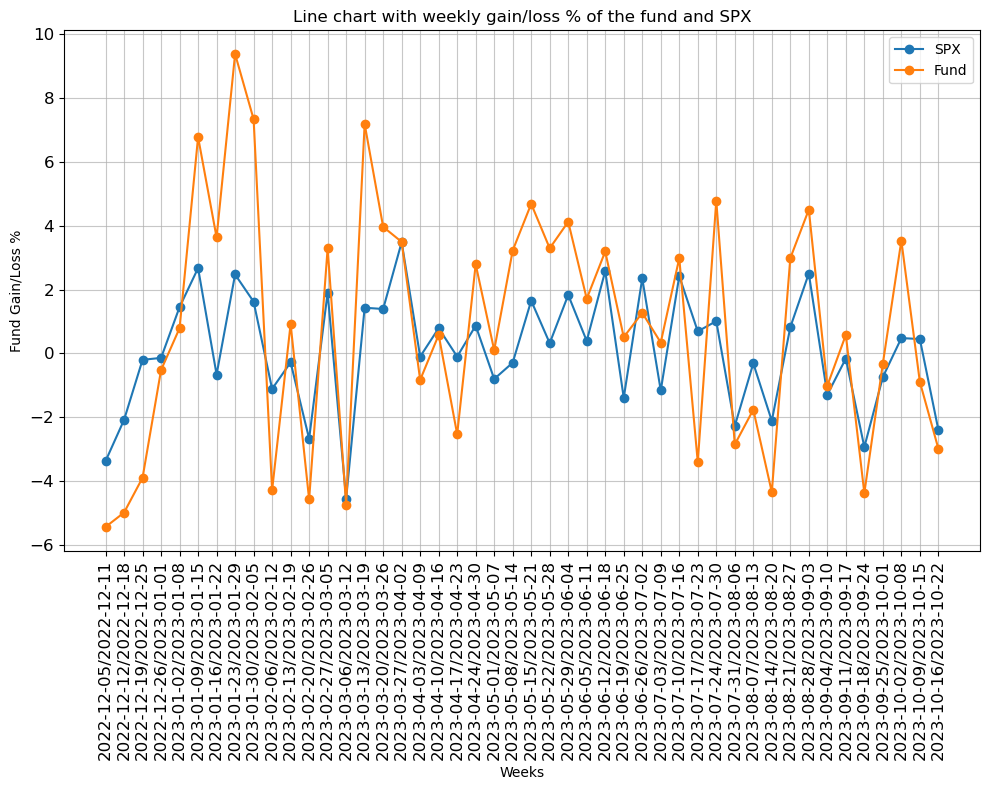

In [19]:
plt.figure(figsize=(10, 8))
plt.plot(spx_gain_loss_week['Weeks'].astype(str), spx_gain_loss_week['Fund Gain/Loss %'], label='SPX', marker='o')
plt.plot(combined_df_week['Weekly'].astype(str), combined_df_week['Fund Gain/Loss %'], label='Fund', marker='o')

plt.xlabel('Weeks')
plt.ylabel('Fund Gain/Loss %')
plt.title('Line chart with weekly gain/loss % of the fund and SPX')
plt.legend(loc='best', fontsize=12)
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

In [20]:
spx_gain_loss_week['Accumulated Gain/Loss %'] = 0.0
accumulated_percentage = 0.0
for index, row in spx_gain_loss_week.iterrows():
    accumulated_percentage += row['Fund Gain/Loss %']
    spx_gain_loss_week.at[index, 'Accumulated Gain/Loss %'] = accumulated_percentage
spx_gain_loss_week.head()

,Weeks,Close,Last_close,Fund Gain/Loss %,Accumulated Gain/Loss %
0,2022-12-05/2022-12-11,3934.379883,4071.699951,-3.37,-3.37
1,2022-12-12/2022-12-18,3852.360107,3934.379883,-2.08,-5.45
2,2022-12-19/2022-12-25,3844.820068,3852.360107,-0.20,-5.65
3,2022-12-26/2023-01-01,3839.500000,3844.820068,-0.14,-5.79
4,2023-01-02/2023-01-08,3895.080078,3839.500000,1.45,-4.34


In [21]:
combined_df_week['Accumulated Gain/Loss %'] = 0.0
accumulated_percentage = 0.0
for index, row in combined_df_week.iterrows():
    accumulated_percentage += row['Fund Gain/Loss %']
    combined_df_week.at[index, 'Accumulated Gain/Loss %'] = accumulated_percentage
combined_df_week.head()

,Weekly,Fund Gain/Loss %,Accumulated Gain/Loss %
0,2022-12-05/2022-12-11,-5.43,-5.43
1,2022-12-12/2022-12-18,-4.98,-10.41
2,2022-12-19/2022-12-25,-3.89,-14.30
3,2022-12-26/2023-01-01,-0.52,-14.82
4,2023-01-02/2023-01-08,0.79,-14.03


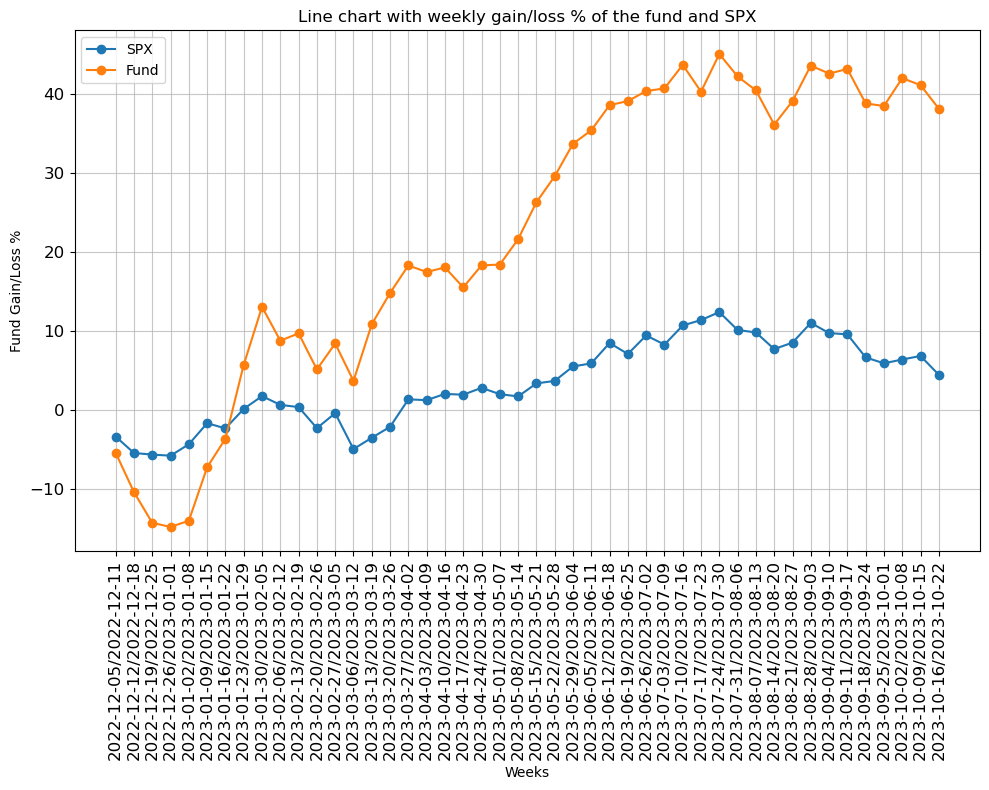

In [22]:
plt.figure(figsize=(10, 8))
plt.plot(spx_gain_loss_week['Weeks'].astype(str), spx_gain_loss_week['Accumulated Gain/Loss %'], label='SPX', marker='o')
plt.plot(combined_df_week['Weekly'].astype(str), combined_df_week['Accumulated Gain/Loss %'], label='Fund', marker='o')

plt.xlabel('Weeks')
plt.ylabel('Fund Gain/Loss %')
plt.title('Line chart with weekly gain/loss % of the fund and SPX')
plt.legend(loc='best', fontsize=12)
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()